In [1]:
import numpy as np
import pandas as pd
import altair as alt
import re
import string
import nltk
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud
from nltk.corpus import stopwords
nltk.download('stopwords')
from altair_saver import save

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/yuqingzhang/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
df_result = pd.read_csv("./data/mturks_results_cleaned.csv")

In [4]:
chart = alt.Chart(df_result,title="Main Category Distribution").mark_bar().encode(
    x = alt.X('most_common', axis = alt.Axis(labels = False, title = 'Categories')),
    y = alt.Y('count()', axis = alt.Axis(title = 'Counts')),
    color=alt.Color('most_common', legend=alt.Legend(title = 'Categories',orient="left"))).properties(width = 400, height = 200)

In [5]:
chart

alt.Chart(...)

In [5]:
filtered_res = df_result[["Input.ingredients", "Input.preparation", "Input.description","Input.document_url", 'most_common']]
df_app = filtered_res[filtered_res.most_common == 'Appetizer or side dish']
df_main = filtered_res[filtered_res.most_common == 'Main course']
df_dessert = filtered_res[filtered_res.most_common == 'Dessert']

In [6]:
def preprocess(text):
    pun = string.punctuation+ "…"
    dig = string.digits
    table_pun = str.maketrans(pun, len(pun) * " ")
    table_dig = str.maketrans(dig, len(dig) * " ")
    processed = text.lower().translate(table_pun).translate(table_dig).strip().split()
    return processed

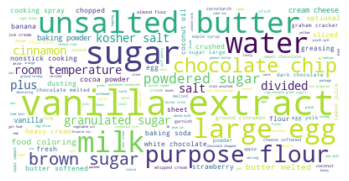

In [23]:
words = []
ingredients = df_dessert['Input.ingredients'].to_list()
stopwords_set = stopwords.words("english") + ['tablespoon','cup','teaspoon','tablespoons','teaspoons','cups','oz']
for text in ingredients:
    words.extend(preprocess(text))
text = " ".join([word for word in words])
wordcloud = WordCloud(stopwords=stopwords_set, background_color="white").generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()
wordcloud.to_file('dessert.png')

In [24]:
def save_word_cloud(input_category):
    filtered_res = df_result[["Input.ingredients", "Input.preparation", "Input.description","Input.document_url", 'most_common']]
    df = filtered_res[filtered_res.most_common == input_category]
    words = []
    ingredients = df['Input.ingredients'].to_list()
    stopwords_set = stopwords.words("english") + ['tablespoon','cup','teaspoon','tablespoons','teaspoons','cups','oz','chopped','sliced','salt','pepper','oil','cloves']
    for text in ingredients:
        words.extend(preprocess(text))
    text = " ".join([word for word in words])
    wordcloud = WordCloud(stopwords=stopwords_set, background_color="white").generate(text)
    filename = input_category + '.png'
    wordcloud.to_file(filename)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

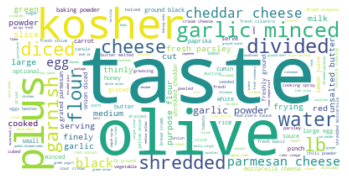

In [26]:
save_word_cloud('Appetizer or side dish')

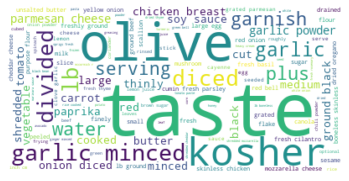

In [27]:
save_word_cloud('Main course')